In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir('../logs/')

In [2]:
def plot(name0, name1, title):
    logs0 = np.load(name0, allow_pickle=True)
    logs1 = np.load(name1, allow_pickle=True)
    print(logs1['params'])
    t_loss0 = logs0['t_loss']
    t_loss1 = logs1['t_loss']
    epochs0 = np.arange(len(t_loss0))
    epochs1 = np.arange(len(t_loss1))

    plt.semilogy(epochs0, t_loss0)
    plt.semilogy(epochs1, t_loss1)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title(title)

def plot2(name0, title=None):
    logs0 = np.load(name0, allow_pickle=True)
    print(logs0['params'])
    t_loss0 = logs0['t_loss']
    v_loss0 = logs0['v_loss']
    epochs0 = np.arange(len(t_loss0))

    plt.semilogy(epochs0, t_loss0)
    plt.semilogy(epochs0, v_loss0)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    if title: plt.title(title)

def plot3(name0, title=None, rate=10, cutoff=1.0, v_only=False, smooth=1):
    logs0 = np.load(name0, allow_pickle=True)
    print(logs0['params'])
    t_loss0 = logs0['t_loss']
    v_loss0 = logs0['v_loss']
    epochs0 = np.arange(len(t_loss0))

    cutoff = int(cutoff * len(epochs0))
    if not v_only:
        x = epochs0[:cutoff]
        y = t_loss0[:cutoff]
        if smooth > 1:
            x_kernel = np.zeros(smooth)
            x_kernel[smooth // 2] = 1
            y_kernel = np.ones(smooth) / smooth
            x = np.convolve(x, x_kernel, mode='valid')
            y = np.convolve(y, y_kernel, mode='valid')
        plt.semilogy(x, y)
    x = epochs0[rate-1:cutoff:rate]
    y = v_loss0[:cutoff//rate]
    if smooth > 1:
        smooth = smooth // rate
        x_kernel = np.zeros(smooth)
        x_kernel[smooth // 2] = 1
        y_kernel = np.ones(smooth) / smooth
        x = np.convolve(x, x_kernel, mode='valid')
        y = np.convolve(y, y_kernel, mode='valid')
    plt.semilogy(x, y)
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    if title: plt.title(title)

## Initial Training

Namespace(batch_size=2048, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[1000, 10000], v_tuple=[0, 1000], weights='init_ab')


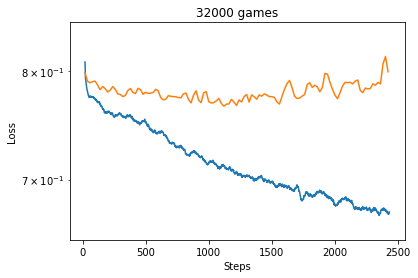

In [21]:
name = '1000_10000bs2048lr0.1d0.001abe10.npz'
plot3(name, '32000 games', rate=20, smooth=40)
plt.ylim([0.85, 0.65])
plt.show()

Namespace(batch_size=8192, decay=0.001, epochs=10, lr=0.1, momentum=0.9, t_tuple=[1000, 10000], v_tuple=[0, 1000], weights='init_ab')


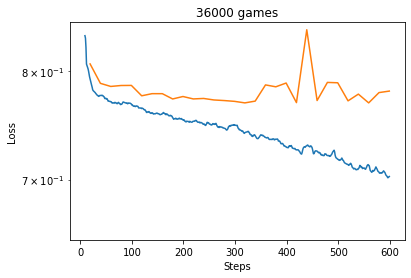

In [22]:
name = '1000_10000bs8192lr0.1d0.001abe10.npz'
plot3(name, '36000 games', rate=20, smooth=20)
plt.ylim([0.85, 0.65])
plt.show()